<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter12/gaussian_process.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
pip install git+https://github.com/benman1/time-series.git

  Cloning https://github.com/benman1/time-series.git to /tmp/pip-req-build-h3a77_y4
  Running command git clone -q https://github.com/benman1/time-series.git /tmp/pip-req-build-h3a77_y4


In [14]:
from time_series.dataset.utils import get_energy_demand
from time_series.dataset.time_series import TrainingDataSet
from time_series.models.gaussian_process import GaussianProcess

train_df = get_energy_demand()
tds2d = TrainingDataSet(train_df.head(500), train_split=0.1, two_dim=True)

In [15]:
# please note this only works in tensorflow Eager mode!
N_EPOCHS = 100
gp = GaussianProcess(tds2d)
gp.instantiate_and_fit(maxiter=N_EPOCHS)

╒═══════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                  │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═══════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Matern52.variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├───────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Matern52.lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═══════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛
╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═════

MSE: 0.4221
----------
CT: 1.68
MASS: 1.12
ME: 1.51
NEMASSBOST: 0.86
NH: 1.62
RI: 1.02
SEMASS: 1.0
TOTAL: 1.38
VT: 1.75
WCMASS: 1.59


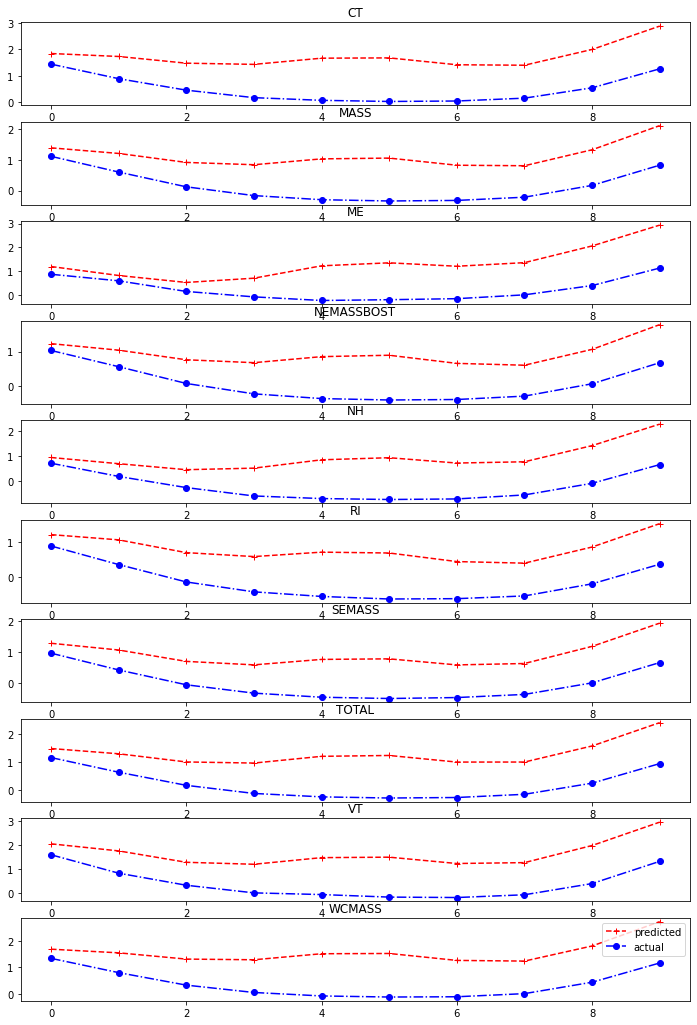

In [16]:
from time_series.utils import evaluate_model

y_predicted = gp.predict(tds2d.X_test)[0].numpy().reshape(-1, tds2d.dimensions, tds2d.n_steps)#%%
evaluate_model(tds=tds2d, y_predicted=y_predicted, columns=train_df.columns, first_n=10)